# *ANALYSING TRAFFIC ACCIDENTS IN THE UNITED STATES FROM 2016 TO 2021*

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for regression and machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**LOAD FILE DATA**

I am using the US Accidents open dataset available on Kaggle. This dataset is a countrywide car accident dataset, covering 49 states of the US, collected from 2016 to 2021. Currently, there are about 2.8 million accident records in this dataset. This dataset has been collected in real-time, using multiple Traffic APIs. 
In the above code cell, I have imported the libraries I will be using for my analysis. Using the Pandas library in python, I load the needed CSV file. 

In [118]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv')
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


****
**TASK 1 - DATA CLEANING**

In this step, you need to get rid of any null values 'NaN', and replace them with a 0 to make it easier during data preprocessing. An alternate way that I will be using is to remove the missing values using dropna(). This way the dataset will become more accurate.

In [119]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(2845342, 47)
(943318, 47)


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     943318 non-null  object 
 1   Severity               943318 non-null  int64  
 2   Start_Time             943318 non-null  object 
 3   End_Time               943318 non-null  object 
 4   Start_Lat              943318 non-null  float64
 5   Start_Lng              943318 non-null  float64
 6   End_Lat                943318 non-null  float64
 7   End_Lng                943318 non-null  float64
 8   Distance(mi)           943318 non-null  float64
 9   Description            943318 non-null  object 
 10  Number                 943318 non-null  float64
 11  Street                 943318 non-null  object 
 12  Side                   943318 non-null  object 
 13  City                   943318 non-null  object 
 14  County                 943318 non-

****
**TASK 2 - WHICH STATE/CITIES HAVE THE MOST AND LEAST ACCIDENTS?**

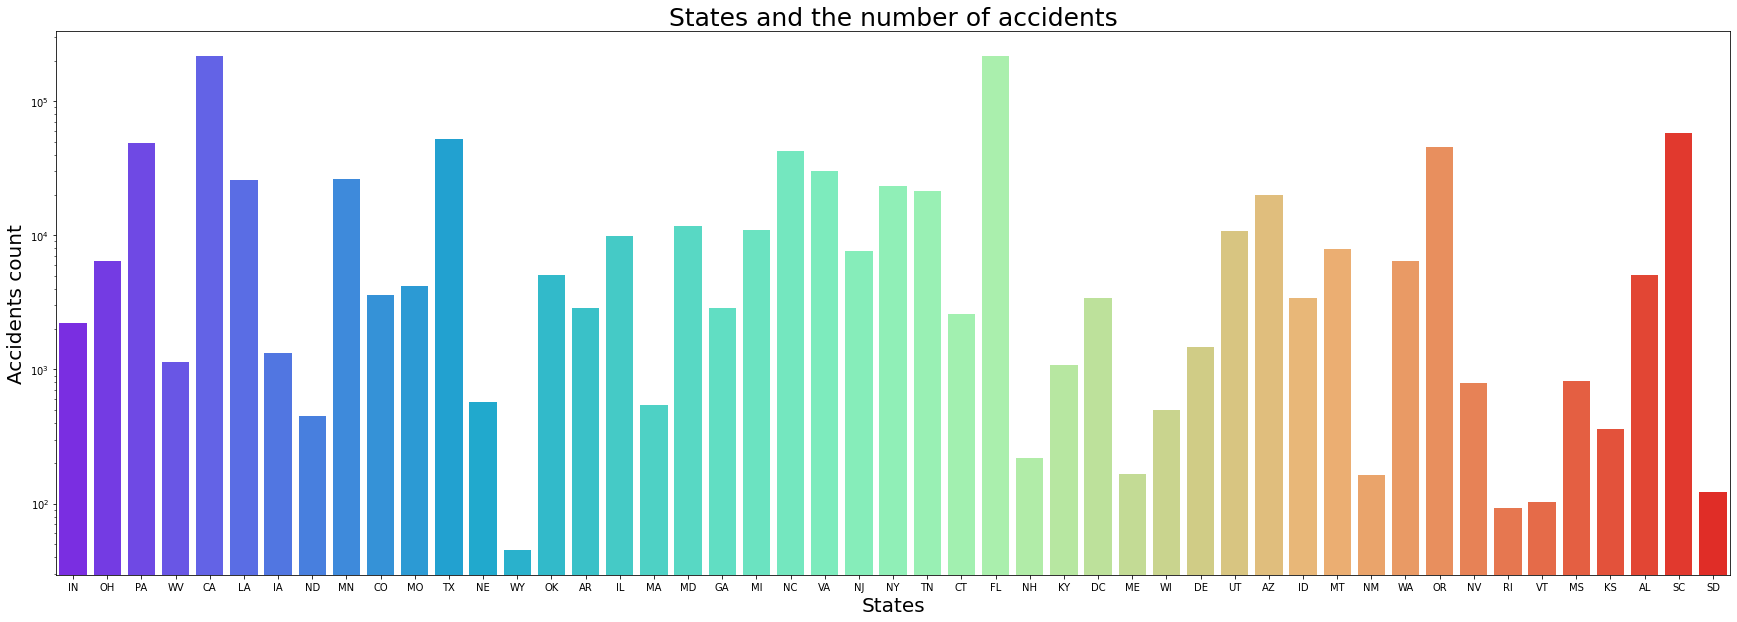

In [121]:
plt.figure(figsize=(30,10))
plt.title("States and the number of accidents", fontdict= {'size':25})
sns.countplot(data = df, x="State", palette = "rainbow")
plt.yscale("log")
plt.xlabel("States",fontdict= {'size':20})
plt.ylabel("Accidents count", fontdict= {'size':20})
plt.show()

From the above graph, we know that both California and Florida have high number of accidents. Wyoming is the state with the least number of accidents. 
It will be very difficult to plot all the different cities so it is easier to list them out with the corresponding number of accidents. 

In [122]:
print(df.City.value_counts())

Miami                           67276
Orlando                         37644
Los Angeles                     20194
Houston                         18923
Charlotte                       16044
                                ...  
Asbury                              1
Prestonsburg                        1
Marble                              1
Intervale                           1
American Fork-Pleasant Grove        1
Name: City, Length: 8504, dtype: int64


From the above list we know that Miami has had the highest number of accidents and the lowest is a group of cities, some of them are Asbury, Prestonsburg, Marble, Intervale, and American Fork-Pleasant Grove.

****
**TASK 3 - WHICH YEAR HAD THE MOST AND LEAST ACCIDENTS? WHICH MONTH HAS THE MOST AND LEAST ACCIDENTS?**

In [123]:
df.Start_Time = pd.to_datetime(df.Start_Time)  #Converting the time to a timestmp in python making it easier for the compute to understand
print("Number of accidents in:")
df_21 = df[df.Start_Time.dt.year == 2021]
print("2021 = ", df_21.Start_Time.value_counts().sum())
df_20 = df[df.Start_Time.dt.year == 2020]
print("2020 = ", df_20.Start_Time.value_counts().sum())
df_19 = df[df.Start_Time.dt.year == 2019]
print("2019 = ", df_19.Start_Time.value_counts().sum())
df_18 = df[df.Start_Time.dt.year == 2018]
print("2018 = ", df_18.Start_Time.value_counts().sum())
df_17 = df[df.Start_Time.dt.year == 2017]
print("2017 = ", df_17.Start_Time.value_counts().sum())
df_16 = df[df.Start_Time.dt.year == 2016]
print("2016 = ", df_16.Start_Time.value_counts().sum())

Number of accidents in:
2021 =  669531
2020 =  219585
2019 =  49694
2018 =  2225
2017 =  1590
2016 =  693


From the above list, you can see that the the number of accidents increases as time passes. From 2016-2018, the number of accidents at most doubled every year. But from 2018 to 2019, the number increased by 20 times. The number of accidents in 2020 was 5 times more that in 2019, and those in 2021 were more than 3 times of the number in 2020.  

To find out when do accidents occur most in the year, I will plot out the trend throughout each year.

<Figure size 2160x720 with 0 Axes>

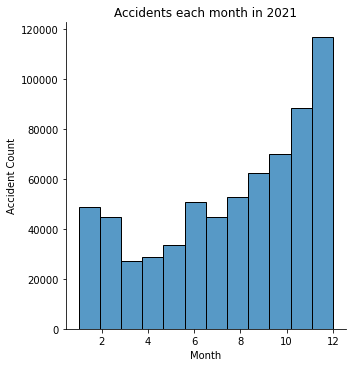

In [124]:
plt.figure(figsize=(30,10))
sns.displot(df_21.Start_Time.dt.month, bins=12)
plt.xlabel("Month",fontdict= {'size':10})
plt.ylabel("Accident Count", fontdict= {'size':10})
plt.title("Accidents each month in 2021")
plt.show()

<Figure size 2160x720 with 0 Axes>

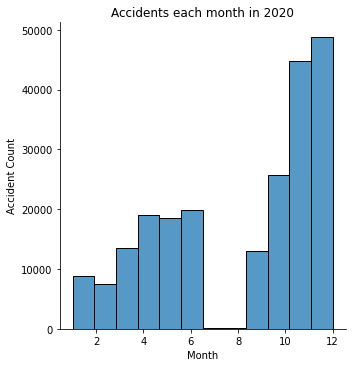

In [125]:
plt.figure(figsize=(30,10))
sns.displot(df_20.Start_Time.dt.month, bins=12)
plt.xlabel("Month",fontdict= {'size':10})
plt.ylabel("Accident Count", fontdict= {'size':10})
plt.title("Accidents each month in 2020")
plt.show()

<Figure size 2160x720 with 0 Axes>

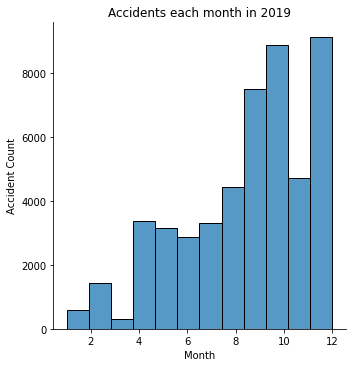

In [126]:
plt.figure(figsize=(30,10))
sns.displot(df_19.Start_Time.dt.month, bins=12)
plt.xlabel("Month",fontdict= {'size':10})
plt.ylabel("Accident Count", fontdict= {'size':10})
plt.title("Accidents each month in 2019")
plt.show()

#print("Total accidents in 2021",df_21.Start_Time.dt.month.value_counts().sum())

<Figure size 2160x720 with 0 Axes>

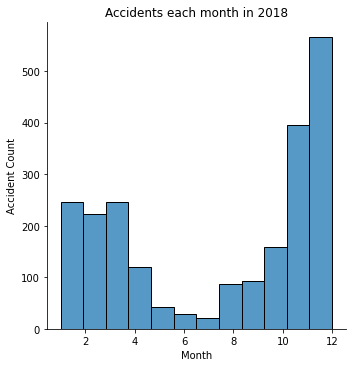

In [127]:
plt.figure(figsize=(30,10))
sns.displot(df_18.Start_Time.dt.month, bins=12)
plt.xlabel("Month",fontdict= {'size':10})
plt.ylabel("Accident Count", fontdict= {'size':10})
plt.title("Accidents each month in 2018")
plt.show()

#print("Total accidents in 2021",df_21.Start_Time.dt.month.value_counts().sum())

<Figure size 2160x720 with 0 Axes>

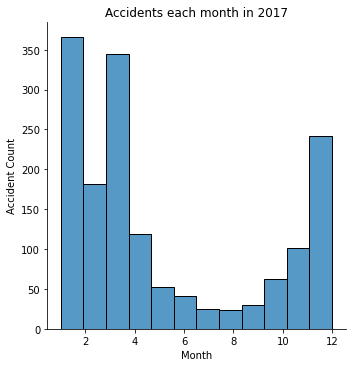

In [128]:
plt.figure(figsize=(30,10))
sns.displot(df_17.Start_Time.dt.month, palette='red', bins=12)
plt.xlabel("Month",fontdict= {'size':10})
plt.ylabel("Accident Count", fontdict= {'size':10})
plt.title("Accidents each month in 2017")
plt.show()

#print("Total accidents in 2021",df_21.Start_Time.dt.month.value_counts().sum())

<Figure size 2160x720 with 0 Axes>

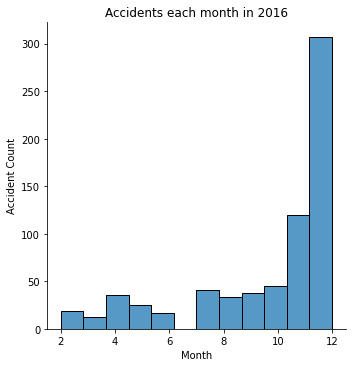

In [129]:
plt.figure(figsize=(30,10))
sns.displot(df_16.Start_Time.dt.month, palette='red', bins=12)
plt.xlabel("Month",fontdict= {'size':10})
plt.ylabel("Accident Count", fontdict= {'size':10})
plt.title("Accidents each month in 2016")
plt.show()

#print("Total accidents in 2021",df_21.Start_Time.dt.month.value_counts().sum())

From the above set of graphs, we know that besides 2017, all the other years had high number of accidents in the last quarter of the year. This could be due to the winter season. If we were to hold that assumption, that would also justify why 2017 had a higher number of accidents in the start of the year, since that is also a part of the winter season in US. 

I will prove this assumption later on when we try to relate the number of accidents to the weather conditions.

****
**TASK 4 - HOW DOES WEATHER AFFECT THE SEVERITY OF AN ACCIDENT?**

We have the information of the dataset from before. Using that, I will select all the columns which have something to do with the weather or the severity of the accidents. This way I will retain only the most relevant columns in a temporary dataset here.

I will start out by first plotting a graph to see the impact of weather conditions on the number of accidents, if there is any.

<AxesSubplot:>

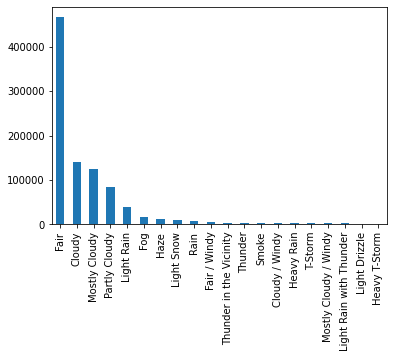

In [130]:
temp = df[['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
           'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
           'Precipitation(in)']]
df.Weather_Condition.value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,align='center',linewidth=1)

From the above graph we can conclude, that weather conditions do not affect the number of accidents too much. This is because the most number of accidents occured when the weather was fair. When it is cloudy or there is slight rain, the chances of an accident occuring exist as well.

In the next part I have created a pearson correlation heatmap to make it easier for comparisons and to find correlations between the different aspects of weather I found most interesting and relevant.

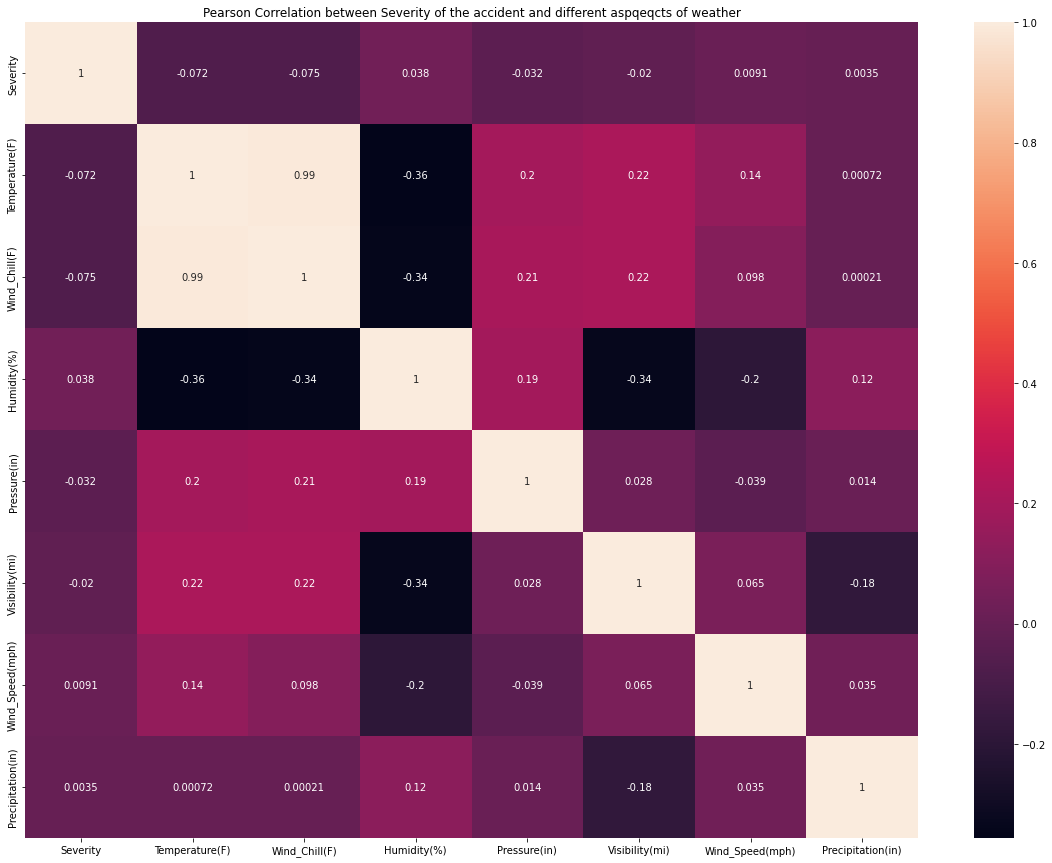

In [131]:
correlation = temp.corr(method='pearson')
plt.figure(figsize=(20, 15))
plt.title('Pearson Correlation between Severity of the accident and different aspqeqcts of weather')
sns.heatmap(correlation, annot=True)
plt.show()

From the above heatmap we know that the strongest correlation is a tie between Visibility and Temparature and Visibility and Wind Chill. All the other correlations are pretty weak and not significant enough to mention. 

****
**TASK 5 - HOW DOES VISIBILITY AFFECT THE SEVERITY OF ACCIDENTS?**

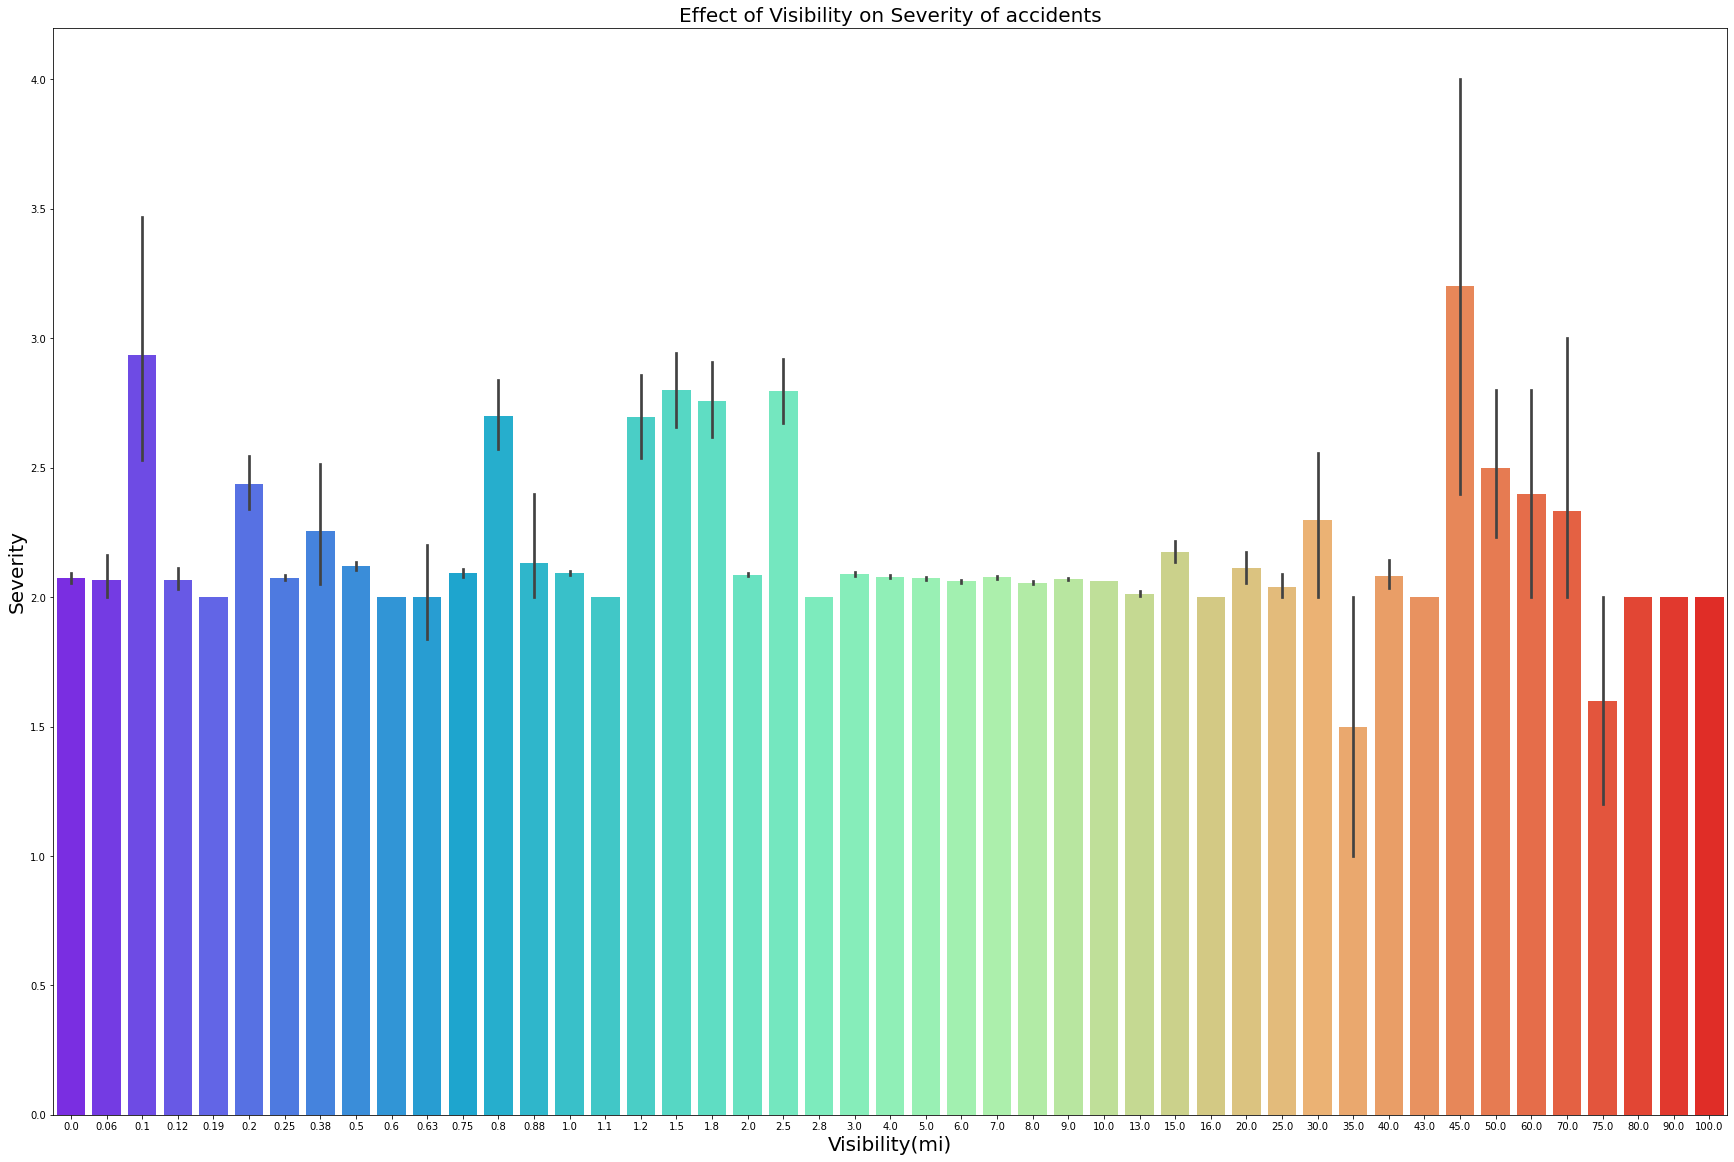

In [132]:
plt.figure(figsize=(30,20))
sns.barplot(data=df, x='Visibility(mi)', y='Severity', palette = 'rainbow')
plt.xlabel("Visibility(mi)",fontdict= {'size':20})
plt.ylabel("Severity", fontdict= {'size':20})
plt.title("Effect of Visibility on Severity of accidents",fontdict= {'size':20})
plt.show()

****
**TASK 6 - HOW DOES TEMPERATURE(F) AFFECT THE SEVERITY OF AN ACCIDENT?**

It is a common assumption that accidents happen a lot when it is snowing outside, so when the temperature is lower. From the graph below we can see if this assumption is true or not.

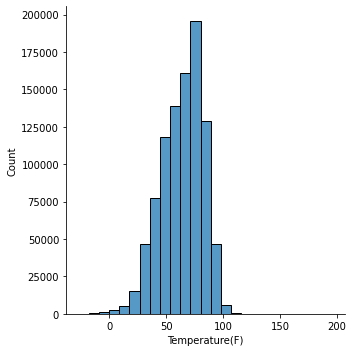

In [133]:
print(sns.displot(df['Temperature(F)'], bins=25))

From the graph above we can conclude that the most accidents occur when the tmperature is in the range of 65-80 F. This is usually the late summer and fall weather in the US. 
As a result, we have proved the assumption made to be wrong. 

****
**TASK 7 - MAP SEVERITY OF AN ACCIDENT TO THE LOCATION**

In this section I will create a scatterplot to plot the severity of a accident to the loation of it.

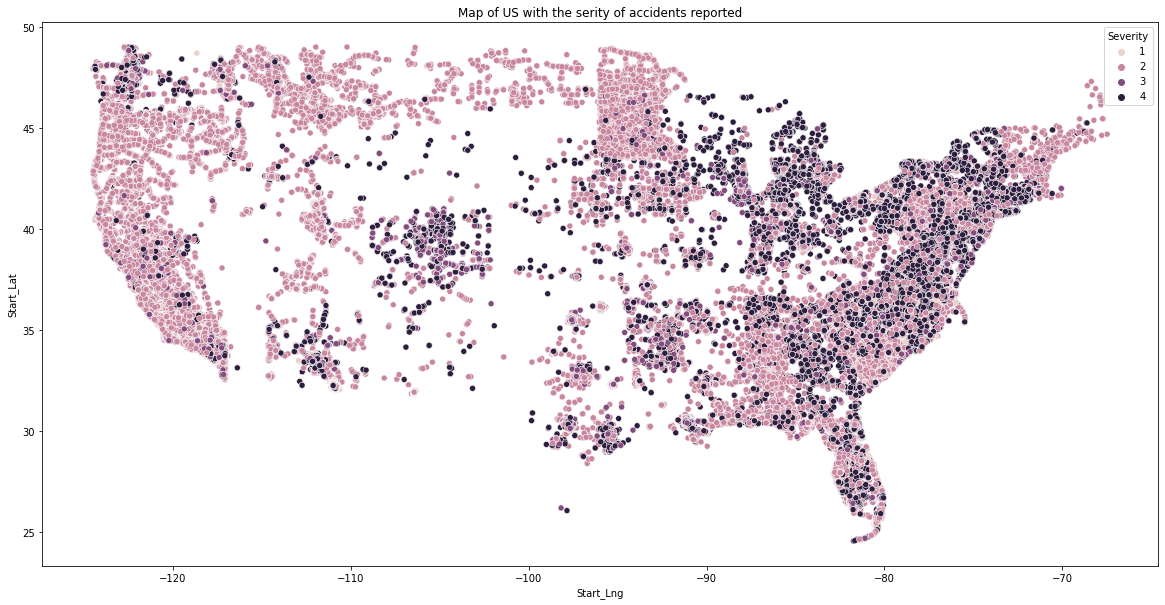

In [134]:
plt.figure(figsize=(20,10))
plt.title('Map of US with the serity of accidents reported')
sns.scatterplot( x=df.Start_Lng, y=df.Start_Lat, hue=df.Severity)
plt.show()

****
**TASK 8 - DATA PREPROCESSING**

In this section I will drop some of the columns which do not have much to do with our analysis and encode the categorical columns.

In [135]:
df = df.drop("ID", axis='columns')
df = df.drop("Description", axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               943318 non-null  int64         
 1   Start_Time             943318 non-null  datetime64[ns]
 2   End_Time               943318 non-null  object        
 3   Start_Lat              943318 non-null  float64       
 4   Start_Lng              943318 non-null  float64       
 5   End_Lat                943318 non-null  float64       
 6   End_Lng                943318 non-null  float64       
 7   Distance(mi)           943318 non-null  float64       
 8   Number                 943318 non-null  float64       
 9   Street                 943318 non-null  object        
 10  Side                   943318 non-null  object        
 11  City                   943318 non-null  object        
 12  County                 943318 non-null  ob

In [136]:
categorical = df.select_dtypes(include=['object','bool', 'datetime']).columns
print(categorical)

Index(['Start_Time', 'End_Time', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


The next task is to convert all the categorical column values to numerical to make it easier for the computer to understand and analyze. 

In [137]:
from sklearn import preprocessing

for i in categorical:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])
    
df.head(5)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
42,4,0,0,40.45112,-85.15048,40.35429,-85.14993,6.690,9001.0,95429,...,0,0,0,0,0,0,1,0,0,0
43,4,0,0,40.35429,-85.14993,40.45112,-85.15048,6.690,473.0,55877,...,0,0,0,0,0,0,1,0,0,0
47,4,1,1,40.72813,-84.78965,40.74559,-84.78962,1.206,12998.0,84801,...,0,0,0,0,0,0,1,1,1,0
50,2,2,2,41.83193,-80.10143,41.84149,-80.11099,0.824,25529.0,37994,...,0,0,0,0,0,0,0,0,0,0
66,2,3,3,41.48339,-81.66297,41.47692,-81.66075,0.462,3937.0,40151,...,0,0,0,0,0,0,0,0,0,0


****
**TASK 9 - SPLITTING THE TRAIN TEST SETS**

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X = df.drop("Severity", axis=1).copy()
Y = df["Severity"].copy()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=100)

X_train.shape

(848986, 44)

****
**TASK 10 - LOGISTIC REGRESSION MODEL**

In [139]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


94.79

In [140]:
coeff = pd.DataFrame(df.columns.delete(0))
coeff.columns = ["Feature"]
coeff["Correlation"] = pd.Series(log_reg.coef_[0])
coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
17,Weather_Timestamp,13.139191
19,Wind_Chill(F),0.670692
13,Zipcode,0.514000
10,City,0.253743
29,Crossing,0.221855
12,State,0.210939
38,Traffic_Signal,0.167660
23,Wind_Direction,0.080765
21,Pressure(in),0.068985
15,Timezone,0.047840


From the above table, you can see the correlation of every feature calculated. Positive correlations show a higher probability and negative ones show inverse relation or lower probability. 

The model confidence of the Logistic Regression model is 94.79.

****
**TASK 11 - DECISION TREE**

In [141]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
# noinspection PyRedeclaration
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.95

The model confidence of the Decision Tree model is 99.95. This is more than that of the Logistic Regression model, hence making it a more reliable model than the former.